In [1]:
import os
import sys
sys.path.append(r"C:\Users\abhil\cocoapi\PythonAPI")
from pycocotools.coco import COCO

In [2]:
dataDir = r'C:\Users\abhil\fiftyone\coco-2014\raw\\'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=5.76s)
creating index...
index created!
loading annotations into memory...
Done (t=0.40s)
creating index...
index created!


In [3]:
list(coco.anns.values())[0]

{'segmentation': [[239.97,
   260.24,
   222.04,
   270.49,
   199.84,
   253.41,
   213.5,
   227.79,
   259.62,
   200.46,
   274.13,
   202.17,
   277.55,
   210.71,
   249.37,
   253.41,
   237.41,
   264.51,
   242.54,
   261.95,
   228.87,
   271.34]],
 'area': 2765.1486500000005,
 'iscrowd': 0,
 'image_id': 558840,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156}

http://images.cocodataset.org/val2014/COCO_val2014_000000158744.jpg


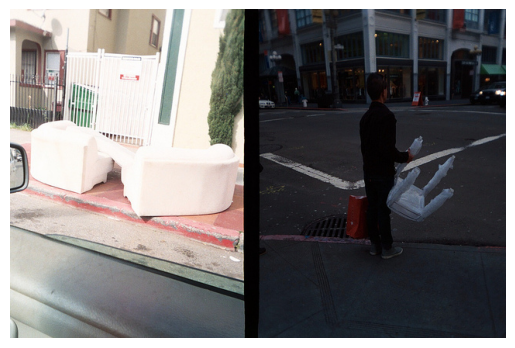

a man is holding some stuff standing by the curb
There is a man standing next to the street.
a split photo of a person standing on a street corner 
A pair of chairs on a curb, and a man carrying a chair on the sidewalk.
Image of the front of a house next to an image of a woman holding a small table. 


In [4]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

In [5]:
import sys
sys.path.append(r'C:\Users\abhil\cocoapi\PythonAPI')
!pip install nltk
import nltk
nltk.download('punkt')
from data_loader import get_loader
from torchvision import transforms
from pycocotools.coco import COCO

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
from data_loader import get_loader

In [7]:
from data_loader import get_loader
# Define a transform to pre-process the training images.
transform_train = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

# Set the minimum word count threshold.
vocab_threshold = 5

# Specify the batch size.
batch_size = 10

# Obtain the data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=False)

C:\Users\abhil\cocoapi/images/train2014/
loading annotations into memory...
Done (t=0.82s)
creating index...
index created!
[0/414113] Tokenizing captions...
[100000/414113] Tokenizing captions...
[200000/414113] Tokenizing captions...
[300000/414113] Tokenizing captions...
[400000/414113] Tokenizing captions...
loading annotations into memory...
Done (t=0.74s)
creating index...
index created!
Obtaining caption lengths...


100%|███████████████████████████████████████████████████████████████████████| 414113/414113 [00:38<00:00, 10677.46it/s]


In [8]:
data_loader.dataset.caption_lengths

[8,
 12,
 11,
 9,
 11,
 11,
 16,
 9,
 9,
 10,
 9,
 10,
 11,
 13,
 9,
 13,
 14,
 10,
 16,
 10,
 17,
 11,
 12,
 11,
 9,
 10,
 11,
 10,
 12,
 10,
 12,
 11,
 10,
 9,
 10,
 11,
 10,
 15,
 11,
 10,
 10,
 9,
 11,
 14,
 10,
 9,
 13,
 11,
 22,
 9,
 8,
 13,
 11,
 9,
 8,
 8,
 9,
 19,
 11,
 12,
 8,
 13,
 13,
 11,
 9,
 14,
 9,
 11,
 13,
 8,
 11,
 10,
 13,
 9,
 9,
 9,
 10,
 16,
 10,
 9,
 9,
 13,
 11,
 10,
 9,
 9,
 11,
 10,
 12,
 12,
 17,
 11,
 11,
 11,
 9,
 10,
 13,
 10,
 10,
 10,
 10,
 10,
 8,
 11,
 12,
 13,
 9,
 10,
 9,
 16,
 10,
 11,
 12,
 13,
 9,
 11,
 13,
 9,
 9,
 14,
 9,
 9,
 10,
 10,
 10,
 11,
 12,
 12,
 8,
 9,
 10,
 9,
 10,
 15,
 9,
 9,
 11,
 8,
 10,
 13,
 10,
 8,
 9,
 9,
 12,
 12,
 10,
 16,
 10,
 10,
 10,
 13,
 12,
 9,
 8,
 12,
 13,
 14,
 14,
 11,
 14,
 11,
 8,
 13,
 11,
 9,
 11,
 15,
 9,
 9,
 9,
 13,
 12,
 13,
 14,
 10,
 14,
 10,
 12,
 9,
 12,
 12,
 13,
 11,
 12,
 14,
 10,
 8,
 13,
 9,
 12,
 12,
 9,
 17,
 13,
 12,
 13,
 12,
 8,
 10,
 14,
 11,
 11,
 12,
 12,
 11,
 11,
 9,
 11,
 10,
 8,
 13,

In [9]:
sample_caption = 'A person doing a trick on a rail while riding a skateboard.'

In [10]:
import nltk

sample_tokens = nltk.tokenize.word_tokenize(str(sample_caption).lower())
print(sample_tokens)

['a', 'person', 'doing', 'a', 'trick', 'on', 'a', 'rail', 'while', 'riding', 'a', 'skateboard', '.']


In [11]:
sample_caption = []

start_word = data_loader.dataset.vocab.start_word
print('Special start word:', start_word)
sample_caption.append(data_loader.dataset.vocab(start_word))
print(sample_caption)

Special start word: <start>
[0]


In [12]:
a = 'I enjoy playing football and run around'
b = nltk.tokenize.word_tokenize(str(a).lower())
[data_loader.dataset.vocab(t) for t in b]

[1665, 721, 355, 2183, 6, 1181, 192]

In [13]:
sample_caption.extend([data_loader.dataset.vocab(token) for token in sample_tokens])
print(sample_caption)

[0, 3, 98, 754, 3, 396, 39, 3, 1010, 207, 139, 3, 753, 18]


In [14]:
end_word = data_loader.dataset.vocab.end_word
print('Special end word:', end_word)

sample_caption.append(data_loader.dataset.vocab(end_word))
print(sample_caption)

Special end word: <end>
[0, 3, 98, 754, 3, 396, 39, 3, 1010, 207, 139, 3, 753, 18, 1]


In [15]:
import torch

sample_caption = torch.Tensor(sample_caption).long()
print(sample_caption)

tensor([   0,    3,   98,  754,    3,  396,   39,    3, 1010,  207,  139,    3,
         753,   18,    1])


In [16]:
# Preview the word2idx dictionary.
dict(list(data_loader.dataset.vocab.word2idx.items())[:10])

{'<start>': 0,
 '<end>': 1,
 '<unk>': 2,
 'a': 3,
 'very': 4,
 'clean': 5,
 'and': 6,
 'well': 7,
 'decorated': 8,
 'empty': 9}

In [17]:
# Print the total number of keys in the word2idx dictionary.
print('Total number of tokens in vocabulary:', len(data_loader.dataset.vocab))

Total number of tokens in vocabulary: 8852


In [18]:
# Modify the minimum word count threshold.
vocab_threshold = 4

# Obtain the data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=False)

C:\Users\abhil\cocoapi/images/train2014/
loading annotations into memory...
Done (t=0.74s)
creating index...
index created!
[0/414113] Tokenizing captions...
[100000/414113] Tokenizing captions...
[200000/414113] Tokenizing captions...
[300000/414113] Tokenizing captions...
[400000/414113] Tokenizing captions...
loading annotations into memory...
Done (t=0.79s)
creating index...
index created!
Obtaining caption lengths...


100%|███████████████████████████████████████████████████████████████████████| 414113/414113 [00:41<00:00, 10047.68it/s]


In [19]:
# Print the total number of keys in the word2idx dictionary.
print('Total number of tokens in vocabulary:', len(data_loader.dataset.vocab))

Total number of tokens in vocabulary: 9947


In [20]:
unk_word = data_loader.dataset.vocab.unk_word
print('Special unknown word:', unk_word)

print('All unknown words are mapped to this integer:', data_loader.dataset.vocab(unk_word))

Special unknown word: <unk>
All unknown words are mapped to this integer: 2


In [21]:
print(data_loader.dataset.vocab('jfkafejw'))
print(data_loader.dataset.vocab('ieowoqjf'))

2
2


In [22]:
# Obtain the data loader (from file). Note that it runs much faster than before!
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_from_file=True)

C:\Users\abhil\cocoapi/images/train2014/
Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...
Done (t=0.79s)
creating index...
index created!
Obtaining caption lengths...


100%|████████████████████████████████████████████████████████████████████████| 414113/414113 [00:44<00:00, 9321.64it/s]


In [23]:
from collections import Counter

# Tally the total number of training captions with each length.
counter = Counter(data_loader.dataset.caption_lengths)
lengths = sorted(counter.items(), key=lambda pair: pair[1], reverse=True)
for value, count in lengths:
    print('value: %2d --- count: %5d' % (value, count))

value: 10 --- count: 86302
value: 11 --- count: 79971
value:  9 --- count: 71920
value: 12 --- count: 57653
value: 13 --- count: 37668
value: 14 --- count: 22342
value:  8 --- count: 20742
value: 15 --- count: 12839
value: 16 --- count:  7736
value: 17 --- count:  4845
value: 18 --- count:  3101
value: 19 --- count:  2017
value:  7 --- count:  1594
value: 20 --- count:  1453
value: 21 --- count:   997
value: 22 --- count:   683
value: 23 --- count:   534
value: 24 --- count:   384
value: 25 --- count:   277
value: 26 --- count:   214
value: 27 --- count:   160
value: 28 --- count:   114
value: 29 --- count:    87
value: 30 --- count:    58
value: 31 --- count:    49
value: 32 --- count:    44
value: 34 --- count:    40
value: 37 --- count:    32
value: 35 --- count:    31
value: 33 --- count:    30
value: 36 --- count:    26
value: 38 --- count:    18
value: 39 --- count:    18
value: 43 --- count:    16
value: 44 --- count:    16
value: 48 --- count:    12
value: 45 --- count:    11
v

In [24]:
import numpy as np
import torch.utils.data as data

# Randomly sample a caption length, and sample indices with that length.
indices = data_loader.dataset.get_train_indices()
print('sampled indices:', indices)

# Create and assign a batch sampler to retrieve a batch with the sampled indices.
new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
data_loader.batch_sampler.sampler = new_sampler
    
# Obtain the batch.
images, captions = next(iter(data_loader))
    
print('images.shape:', images.shape)
print('captions.shape:', captions.shape)

# (Optional) Uncomment the lines of code below to print the pre-processed images and captions.
# print('images:', images)
# print('captions:', captions)

sampled indices: [62186, 119210, 39161, 264437, 104402, 379269, 147524, 302535, 181962, 26733]


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\abhil\\cocoapi/images/train2014/COCO_train2014_000000477390.jpg'

In [ ]:
# Watch for any changes in model.py, and re-load it automatically.
% load_ext autoreload
% autoreload 2

# Import EncoderCNN and DecoderRNN. 
from model import EncoderCNN, DecoderRNN